# Import de bibliotecas

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import joblib
from sklearn import svm
from sklearn import metrics

Mounting directory of dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

% cd /content/drive/My\ Drive/DHAUZ-case/churn_challenge

Mounted at /content/drive
/content/drive/My Drive/DHAUZ-case/churn_challenge


**a) Elabore hipóteses e visualizações envolvendo a variável churn e, pelo menos, outras três variáveis presentes no dataset**

In [4]:
# load data in dataframe format
data = pd.read_csv('churn_challenge_data.csv')

In [7]:
# check the format of the data with the 10 first ones
data.head(10)

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,crclscod,creditcd,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,dualband,...,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,new_cell,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,ownrent,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,prizm_social_one,recv_sms_Mean,recv_vce_Mean,refurb_new,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,116,30,322.0,136.0,38.0,83.37,32.69,29.66,0.0,0.666667,0.0,0.333333,0.000000,0.000000,-157.25,-18.9975,0.0,45.000000,45.000000,A,Y,0.000000,0.2475,0.0,1.333333,0.0,0.666667,Y,...,219.25,0.0,90.643333,0.0,55.220000,0.0,132.600000,97.176667,0.000000,0.000000,U,3.0,0.0,24.000000,0.00,0.00,O,0.000000,0.0,58.000000,2.0,0.0,52.333333,S,0.0,42.333333,N,23.9975,0.0,0.0,0.000000,1652,4228.00000,22.500,1504.62,0.0,0.0,6.333333,2,0.00
1,1000002,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,158,40,477.0,275.0,48.0,479.40,265.89,51.53,0.0,1.000000,0.0,5.666667,5.463333,6.333333,532.25,50.9875,0.0,193.333333,193.333333,EA,Y,1.666667,0.2475,0.0,9.333333,0.0,8.333333,N,...,482.75,0.0,189.396667,0.0,169.343333,0.0,75.333333,55.280000,3.696667,24.216667,N,1.0,0.0,157.000000,22.75,9.10,NaN,46.333333,0.0,83.666667,7.0,0.0,263.333333,U,0.0,69.000000,N,57.4925,0.0,1.0,0.333333,14654,26400.00000,37.425,2851.68,1.0,0.0,61.333333,1,9.10
2,1000003,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,7,17,11.0,6.0,17.0,433.98,140.86,34.54,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-4.25,0.0000,0.0,6.000000,6.000000,C,Y,0.000000,0.0000,0.0,0.333333,0.0,0.333333,N,...,10.25,0.0,5.426667,0.0,0.233333,0.0,5.193333,0.000000,0.000000,0.000000,Y,2.0,0.0,1.000000,0.00,0.00,O,0.000000,0.0,5.000000,2.0,0.0,9.000000,S,0.0,0.333333,N,16.9900,0.0,0.0,0.000000,7903,24385.05333,16.990,2155.91,0.0,0.0,2.666667,1,0.00
3,1000004,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,3,38,50.0,25.0,40.0,63.23,30.81,40.45,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-1.50,0.0000,0.0,3.666667,3.666667,B,Y,0.000000,0.0000,0.0,0.000000,0.0,0.000000,N,...,7.50,0.0,8.410000,0.0,5.450000,0.0,3.380000,0.413333,0.000000,0.256667,Y,1.0,0.0,3.666667,0.00,0.00,NaN,0.333333,0.0,1.333333,1.0,0.0,3.666667,T,0.0,1.333333,N,38.0000,0.0,0.0,0.000000,1502,3065.00000,38.000,2000.90,0.0,0.0,0.000000,1,0.00
4,1000005,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,191,55,586.0,196.0,80.0,249.38,79.50,38.69,0.0,0.666667,0.0,0.000000,11.076667,15.000000,38.50,0.0000,0.0,137.000000,137.000000,A,Y,8.666667,0.0000,0.0,10.333333,0.0,9.666667,Y,...,570.50,0.0,285.233333,0.0,218.086667,0.0,173.476667,106.330000,0.366667,10.816667,Y,1.0,0.0,90.333333,0.00,0.00,R,14.666667,0.0,97.333333,6.0,0.0,222.333333,U,0.0,94.666667,N,55.2300,0.0,0.0,0.000000,4485,14028.00000,71.980,2181.12,0.0,0.0,77.000000,1,0.00
5,1000006,0,C,2,40295.00,26362,3932.90,1.0,GREAT LAKES AREA,N,702.000000,1260,960,80,1187.0,853.0,78.0,857.34,560.89,83.68,0.0,7.666667,0.0,22.666667,7.753333,11.000000,156.75,8.1450,0.0,577.333333,577.333333,C,Y,4.333333,1.2375,0.0,59.666667,0.0,52.000000,N,...,1312.25,0.0,369.536667,0.0,187.760000,0.0,382.096667,200.320000,85.146667,243.213333,Y,1.0,0.0,303.666667,0.00,0.00,O,370.333333,0.0,555.666667,9.0,0.0,702.000000,U,0.0,365.000000,N,82.2750,0.0,0.0,1.333333,26812,40869.00000,75.000,4033.98,0.0,0.0,76.000000,2,0.00
6,1000007,1,I,2,17371.03,6271,3065.24,3.0,DALLAS AREA,N,0.000000,0,0,17,0.0,0.0

In [119]:
# Check the number of rows and columns 
data.shape

(100000, 99)

In [120]:
# Exploring the titles of the dataframe object
data.columns

Index(['Customer_ID', 'churn', 'HHstatin', 'actvsubs', 'adjmou', 'adjqty',
       'adjrev', 'adults', 'area', 'asl_flag', 'attempt_Mean', 'avg3mou',
       'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou',
       'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean',
       'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou',
       'change_rev', 'comp_dat_Mean', 'comp_vce_Mean', 'complete_Mean',
       'crclscod', 'creditcd', 'custcare_Mean', 'da_Mean', 'datovr_Mean',
       'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'dualband',
       'dwllsize', 'dwlltype', 'eqpdays', 'ethnic', 'forgntvl', 'hnd_price',
       'hnd_webcap', 'income', 'infobase', 'inonemin_Mean', 'kid0_2',
       'kid11_15', 'kid16_17', 'kid3_5', 'kid6_10', 'lor', 'marital', 'models',
       'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean',
       'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean',
       'mouiwylisv_Mean', 'mouowy

In [121]:
# the overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       100000 non-null  int64  
 1   churn             100000 non-null  int64  
 2   HHstatin          62077 non-null   object 
 3   actvsubs          100000 non-null  int64  
 4   adjmou            100000 non-null  float64
 5   adjqty            100000 non-null  int64  
 6   adjrev            100000 non-null  float64
 7   adults            76981 non-null   float64
 8   area              99960 non-null   object 
 9   asl_flag          100000 non-null  object 
 10  attempt_Mean      100000 non-null  float64
 11  avg3mou           100000 non-null  int64  
 12  avg3qty           100000 non-null  int64  
 13  avg3rev           100000 non-null  int64  
 14  avg6mou           97161 non-null   float64
 15  avg6qty           97161 non-null   float64
 16  avg6rev           971

In [122]:
# statistics of the dataset
data.describe()

,Customer_ID,churn,actvsubs,adjmou,adjqty,adjrev,adults,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,eqpdays,forgntvl,hnd_price,income,inonemin_Mean,lor,models,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,recv_sms_Mean,recv_vce_Mean,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,76981.000000,100000.000000,100000.000000,100000.000000,100000.000000,97161.000000,97161.000000,97161.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99109.000000,99109.000000,100000.000000,100000.000000,100000.000000,100000.000000,99643.000000,99643.000000,100000.000000,100000.000000,100000.000000,99999.000000,98268.000000,99153.000000,74564.000000,100000.000000,69810.000000,99999.000000,100000.000000,99643.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,50634.000000,100000.000000,100000.000000,99643.000000,99643.000000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000,100000.000000,100000.000000,100000.000000,99643.000000,99643.000000,98268.000000,100000.000000,100000.000000,100000.000000,99643.000000,100000.000000,98268.000000,100000.000000,100000.000000,100000.000000,99643.000000
mean,1.050000e+06,0.495620,1.358960,7546.314699,2836.366920,960.111529,2.530326,145.752225,519.641210,180.337320,59.193330,509.634576,178.365157,58.683618,483.726493,173.554507,57.913832,0.025777,4.022917,0.011700,1.782928,3.683328,4.666880,-13.933818,-1.021067,0.774442,108.892535,109.666977,1.790838,0.888828,0.261318,10.044298,0.040520,5.955085,391.932309,0.057974,101.875763,5.783112,29.766550,6.177238,1.545825,18.833990,513.559937,1.844036,227.763520,1.135804,165.280703,0.707832,174.080788,111.654562,18.193037,28.467865,1.567563,0.416283,66.003498,41.072247,13.559560,24.753320,0.358162,88.480285,1.787118,0.870548,144.881677,0.047590,55.085152,58.719985,1.286405,0.082580,0.284720,2877.141930,7648.363833,46.179136,1031.924988,0.188820,0.029810,27.784905,1.548140,13.295062
std,2.886766e+04,0.499983,0.655555,8594.889729,3756.513882,840.170815,1.452819,159.348094,533.634073,192.725835,46.695429,496.663453,182.724565,40.758577,438.485213,167.824576,36.161292,1.490255,10.672202,0.547470,5.353953,10.539981,12.761953,276.087509,50.363209,8.129844,118.580079,119.594305,5.315570,2.177619,3.126531,15.418406,0.877136,8.954715,256.482193,0.233696,61.005671,2.182132,55.833753,4.735267,0.898395,9.655794,525.168140,23.733226,264.403894,17.768683,237.332918,8.410151,207.673553,162.691285,41.421462,48.962903,0.625456,4.652627,91.456885,97.296150,30.500885,34.414822,4.065630,103.066103,1.313977,9.053901,158.267711,2.127422,86.841198,46.291677,14.711374,0.275248,1.092101,3790.863474,8666.558293,23.623489,852.907511,0.391368,0.496970,38.358734,1.075255,30.056089
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,9.989998,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000

In [123]:
# checking how many churns we have in total
data.churn.value_counts()

0    50438
1    49562
Name: churn, dtype: int64

So we have almost half of the total of the customers that are in churn. Assuming '1' to be churn and '0' not.

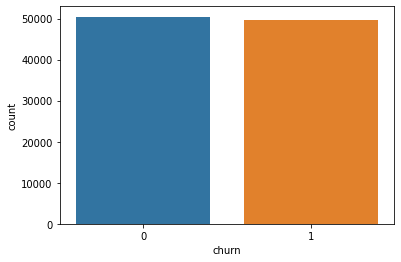

In [124]:
# plot of the churn
ax = sb.countplot(x="churn", data=data)

In [125]:
# checking the geogrpahic area of the users
data.area.value_counts()

NEW YORK CITY AREA               11098
LOS ANGELES AREA                  6636
DC/MARYLAND/VIRGINIA AREA         6567
MIDWEST AREA                      6346
SOUTHWEST AREA                    6187
ATLANTIC SOUTH AREA               6132
CALIFORNIA NORTH AREA             5913
NEW ENGLAND AREA                  5452
DALLAS AREA                       5426
CHICAGO AREA                      5141
GREAT LAKES AREA                  4649
OHIO AREA                         4580
NORTH FLORIDA AREA                4350
HOUSTON AREA                      4341
NORTHWEST/ROCKY MOUNTAIN AREA     4328
CENTRAL/SOUTH TEXAS AREA          4299
SOUTH FLORIDA AREA                3332
TENNESSEE AREA                    2737
PHILADELPHIA AREA                 2446
Name: area, dtype: int64

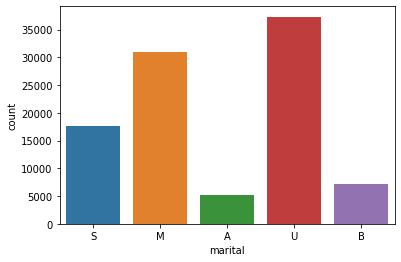

In [126]:
# check the overall marital satus 
data.marital.value_counts
# plot of the marital
mx = sb.countplot(x="marital", data=data)

In [127]:
# check the overall creditcd: Credit card indicator
data.creditcd.value_counts

<bound method IndexOpsMixin.value_counts of 0        Y
1        Y
2        Y
3        Y
4        Y
        ..
99995    Y
99996    Y
99997    N
99998    N
99999    N
Name: creditcd, Length: 100000, dtype: object>

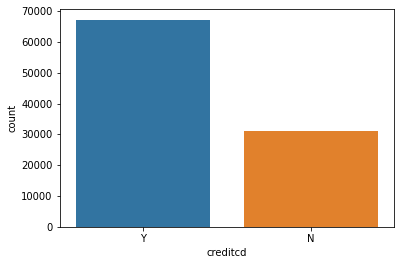

In [128]:
# plot of the creditcd
cx = sb.countplot(x="creditcd", data=data)

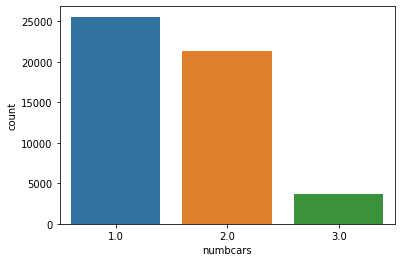

In [129]:
# plot of the numbcars: Known number of vehicles
nx = sb.countplot(x="numbcars", data=data)

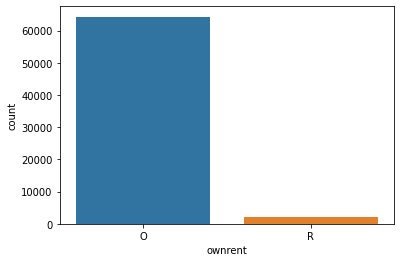

In [130]:
# plot of the ownrent: Home owner/renter status
ox = sb.countplot(x="ownrent", data=data)

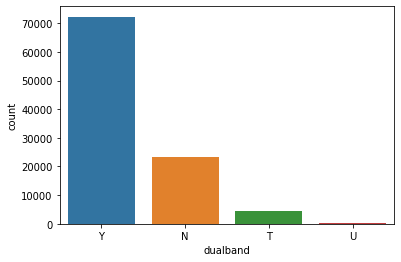

In [131]:
# plot of the dualband: Dualband
dx = sb.countplot(x="dualband", data=data)

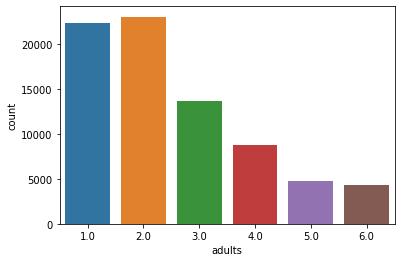

In [132]:
# plot of the adults: Number of adults in household
adults_x = sb.countplot(x="adults", data=data)

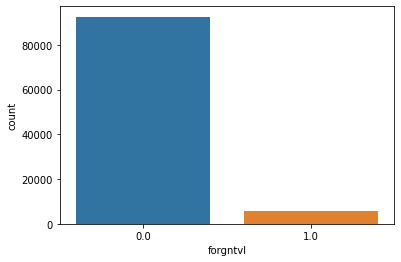

In [133]:
# plot of the forgntvl: Foreign travel dummy variable
fx = sb.countplot(x="forgntvl", data=data)

The variables ownrent and forgntvl are unbalanced or irrelevant, so probably not a good idea to use them in our model

# Checking the correlation of the data

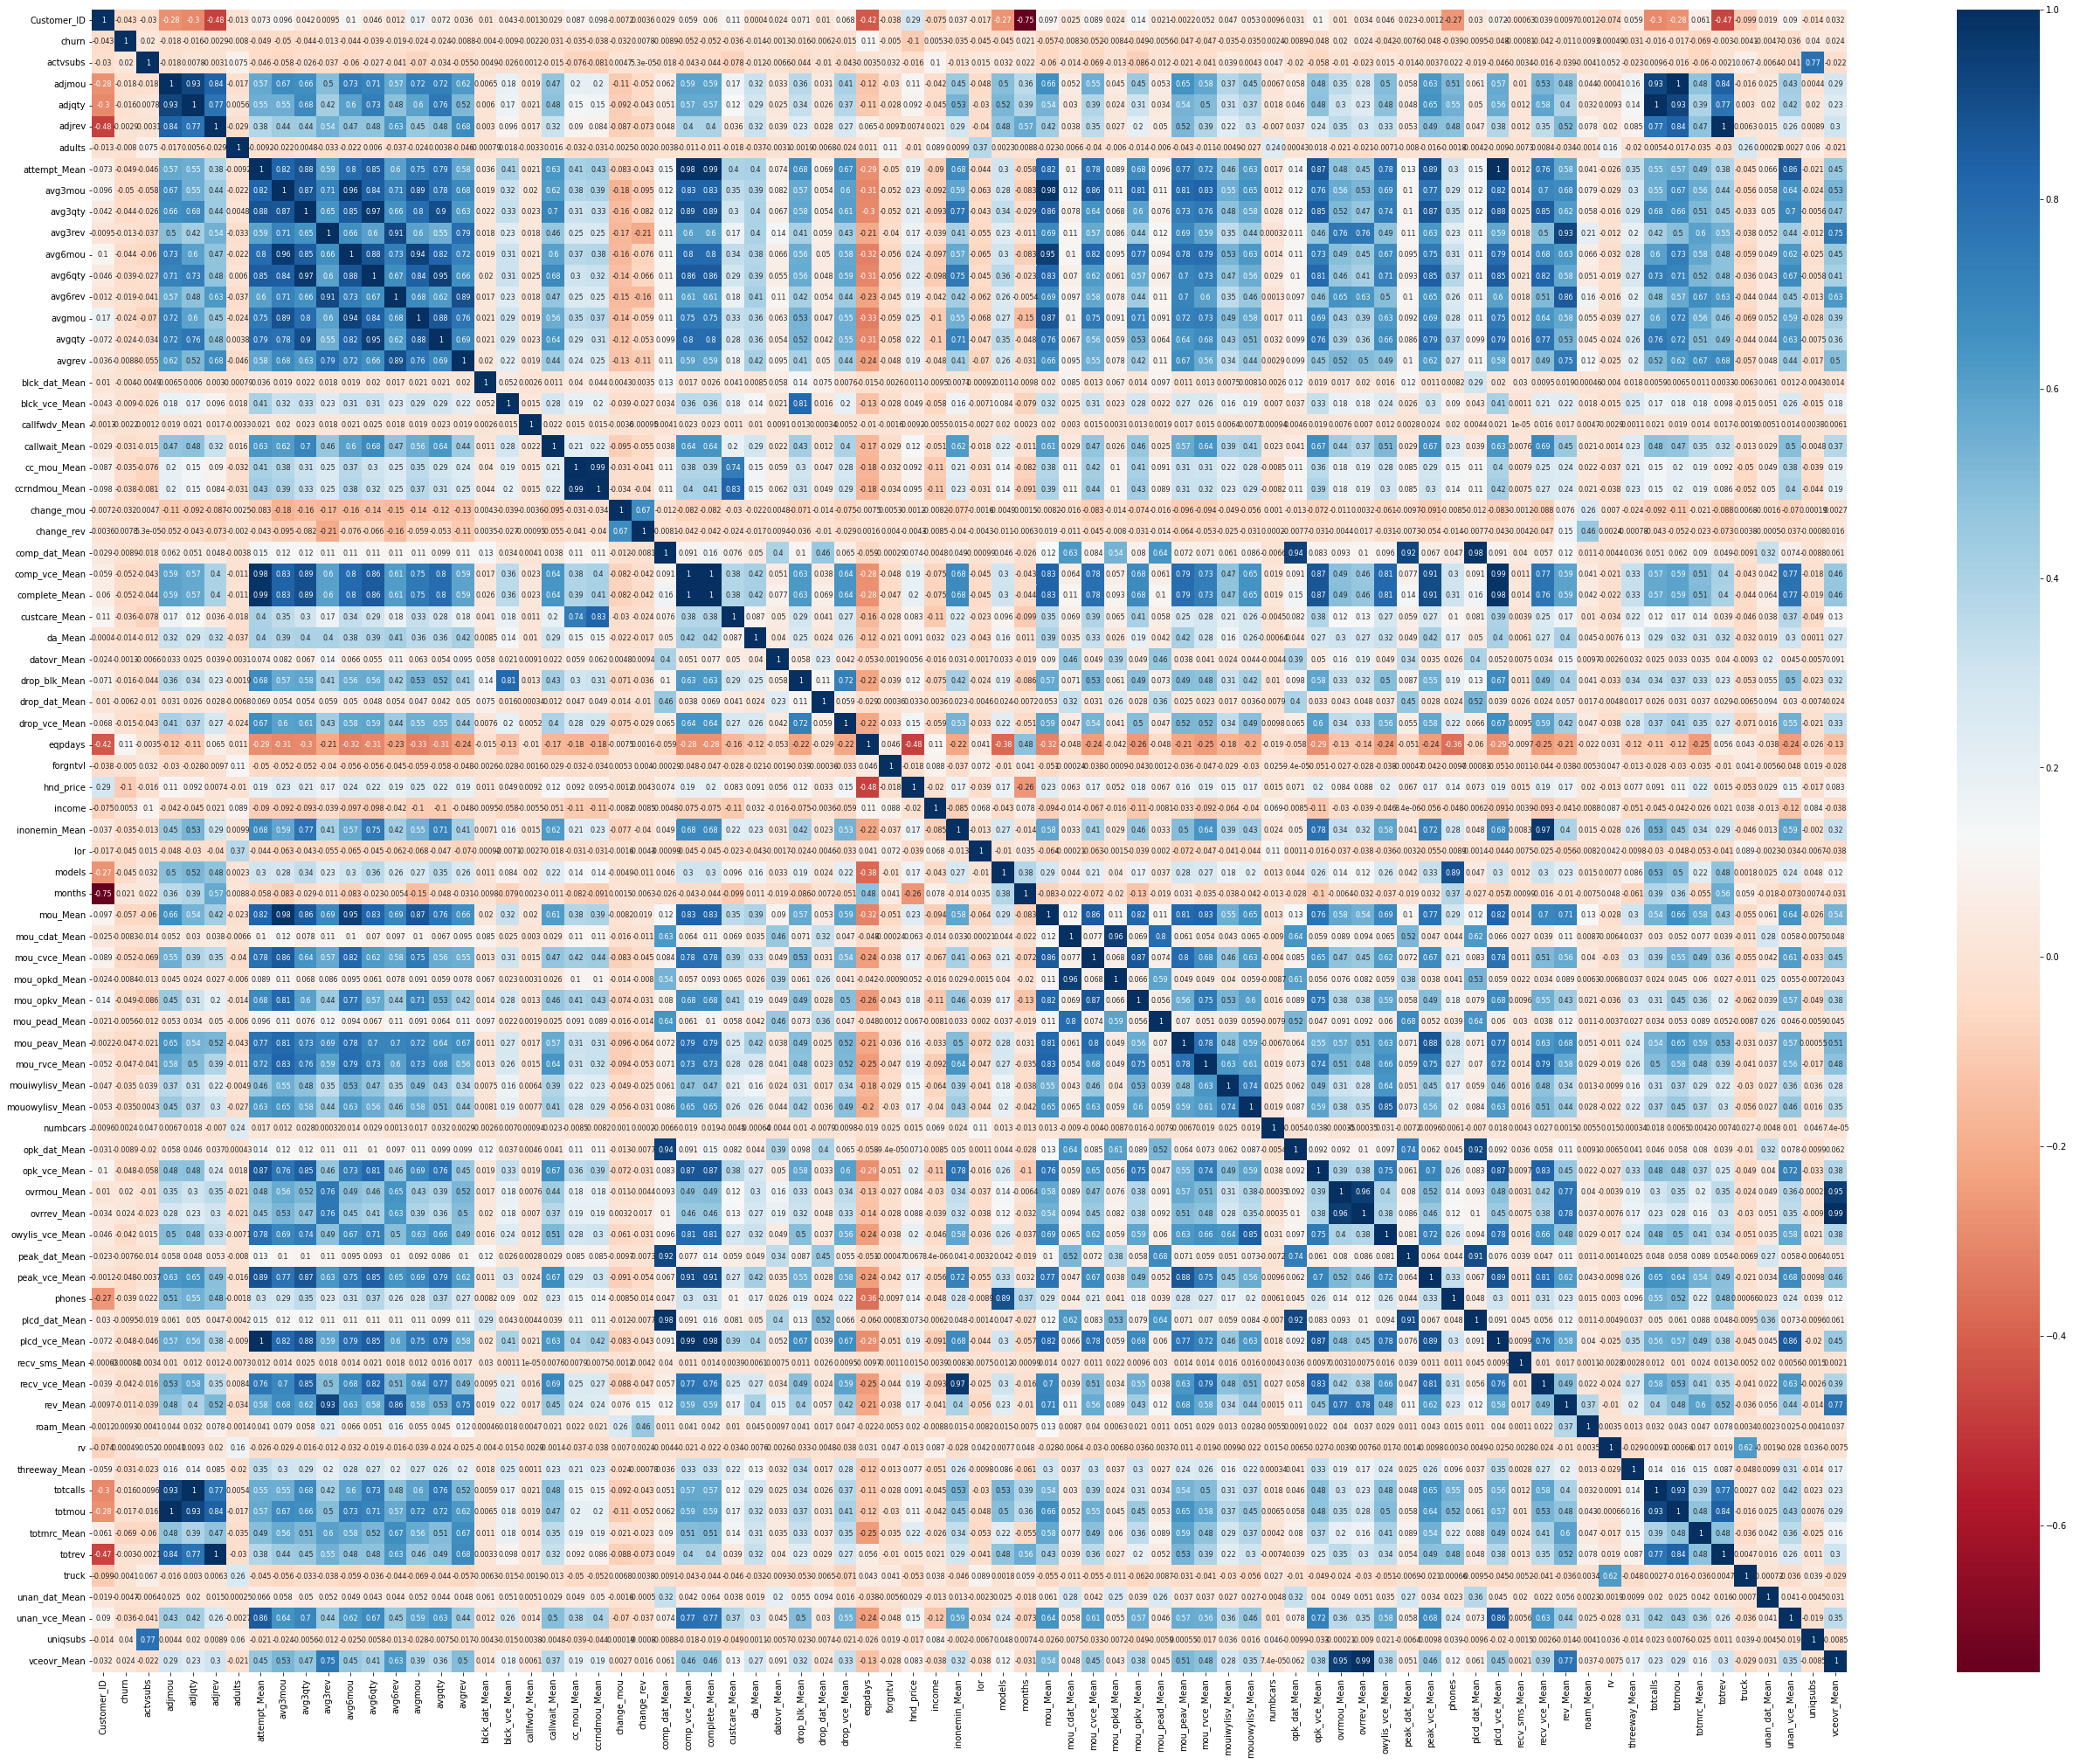

In [67]:
# Use the heatmap of seaborn to visualize the correlation
plt.figure(figsize=(45, 35))
sb.heatmap(data.corr(), annot=True, cmap='RdBu', annot_kws={'fontsize': 8})

# Generate e new dataset without some of the features that are unbalnced/irrelevant

In [8]:
def gen_new_dataset(dataset, list_features):
    new_data = dataset
    for item in list_features:
        new_data.drop(item, axis=1, inplace=True)
    return new_data

delet_features = ['Customer_ID', 'ownrent', 'forgntvl']
new_data = gen_new_dataset(data, delet_features)

#print('new dataset has size = {}'.format(new_data.head))

In [9]:
# checking the new dataset
print('new dataset has size = {}'.format(new_data.shape))

new_data.head(7)

new dataset has size = (100000, 96)


,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,crclscod,creditcd,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,dualband,dwllsize,...,months,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,new_cell,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,prizm_social_one,recv_sms_Mean,recv_vce_Mean,refurb_new,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,116,30,322.0,136.0,38.0,83.37,32.69,29.66,0.0,0.666667,0.0,0.333333,0.000000,0.000000,-157.25,-18.9975,0.0,45.000000,45.000000,A,Y,0.000000,0.2475,0.0,1.333333,0.0,0.666667,Y,A,...,61,219.25,0.0,90.643333,0.0,55.220000,0.0,132.600000,97.176667,0.000000,0.000000,U,3.0,0.0,24.000000,0.00,0.0,0.000000,0.0,58.000000,2.0,0.0,52.333333,S,0.0,42.333333,N,23.9975,0.0,0.0,0.000000,1652,4228.00000,22.500,1504.62,0.0,0.0,6.333333,2,0.0
1,0,C,1,26367.00,14624,2833.88,1.0,CHICAGO AREA,N,263.333333,305,158,40,477.0,275.0,48.0,479.40,265.89,51.53,0.0,1.000000,0.0,5.666667,5.463333,6.333333,532.25,50.9875,0.0,193.333333,193.333333,EA,Y,1.666667,0.2475,0.0,9.333333,0.0,8.333333,N,A,...,56,482.75,0.0,189.396667,0.0,169.343333,0.0,75.333333,55.280000,3.696667,24.216667,N,1.0,0.0,157.000000,22.75,9.1,46.333333,0.0,83.666667,7.0,0.0,263.333333,U,0.0,69.000000,N,57.4925,0.0,1.0,0.333333,14654,26400.00000,37.425,2851.68,1.0,0.0,61.333333,1,9.1
2,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,7,17,11.0,6.0,17.0,433.98,140.86,34.54,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-4.25,0.0000,0.0,6.000000,6.000000,C,Y,0.000000,0.0000,0.0,0.333333,0.0,0.333333,N,A,...,58,10.25,0.0,5.426667,0.0,0.233333,0.0,5.193333,0.000000,0.000000,0.000000,Y,2.0,0.0,1.000000,0.00,0.0,0.000000,0.0,5.000000,2.0,0.0,9.000000,S,0.0,0.333333,N,16.9900,0.0,0.0,0.000000,7903,24385.05333,16.990,2155.91,0.0,0.0,2.666667,1,0.0
3,0,C,1,3035.00,1479,1941.81,4.0,CHICAGO AREA,N,3.666667,8,3,38,50.0,25.0,40.0,63.23,30.81,40.45,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-1.50,0.0000,0.0,3.666667,3.666667,B,Y,0.000000,0.0000,0.0,0.000000,0.0,0.000000,N,D,...,60,7.50,0.0,8.410000,0.0,5.450000,0.0,3.380000,0.413333,0.000000,0.256667,Y,1.0,0.0,3.666667,0.00,0.0,0.333333,0.0,1.333333,1.0,0.0,3.666667,T,0.0,1.333333,N,38.0000,0.0,0.0,0.000000,1502,3065.00000,38.000,2000.90,0.0,0.0,0.000000,1,0.0
4,0,C,1,13965.00,4452,2166.48,1.0,NEW ENGLAND AREA,N,222.333333,558,191,55,586.0,196.0,80.0,249.38,79.50,38.69,0.0,0.666667,0.0,0.000000,11.076667,15.000000,38.50,0.0000,0.0,137.000000,137.000000,A,Y,8.666667,0.0000,0.0,10.333333,0.0,9.666667,Y,O,...,57,570.50,0.0,285.233333,0.0,218.086667,0.0,173.476667,106.330000,0.366667,10.816667,Y,1.0,0.0,90.333333,0.00,0.0,14.666667,0.0,97.333333,6.0,0.0,222.333333,U,0.0,94.666667,N,55.2300,0.0,0.0,0.000000,4485,14028.00000,71.980,2181.12,0.0,0.0,77.000000,1,0.0
5,0,C,2,40295.00,26362,3932.90,1.0,GREAT LAKES AREA,N,702.000000,1260,960,80,1187.0,853.0,78.0,857.34,560.89,83.68,0.0,7.666667,0.0,22.666667,7.753333,11.000000,156.75,8.1450,0.0,577.333333,577.333333,C,Y,4.333333,1.2375,0.0,59.666667,0.0,52.000000,N,NaN,...,59,1312.25,0.0,369.536667,0.0,187.760000,0.0,382.096667,200.320000,85.146667,243.213333,Y,1.0,0.0,303.666667,0.00,0.0,370.333333,0.0,555.666667,9.0,0.0,702.000000,U,0.0,365.000000,N,82.2750,0.0,0.0,1.333333,26812,40869.00000,75.000,4033.98,0.0,0.0,76.000000,2,0.0
6,1,I,2,17371.03,6271,3065.24,3.0,DALLAS AREA,N,0.000000,0,0,17,0.0,0.0,17.0,334.06,120.60,58.95,0.0,0.000000,0.0,0.000000,0.00

# Model setup

In [144]:
# separating into train and test
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('churn', axis=1), new_data['churn'], test_size=0.3)

# checking the size the train and test groups
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(70000, 95) (30000, 95)
(70000,) (30000,)


In [6]:
# since we can't pass str to your model fit() method, so a workaround ...
def convert(data):
    number = preprocessing.LabelEncoder()
    for column in data:
      if data[column].dtype == 'O':
        data[column] = number.fit_transform(data[column])
    data=data.fillna(-999)
    return data

In [153]:
# building a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# since we can't pass str to your model fit() method, so a workaround ...
def convert(data):
    number = preprocessing.LabelEncoder()
    for column in data:
      if data[column].dtype == 'O':
        data[column] = number.fit_transform(data[column])
    data=data.fillna(-999)
    return data

# converting the X_train and X_test into numeric
X_train = convert(X_train)
X_test = convert(X_test)

# train
knn.fit(X_train, y_train)

# deploy the trained model on the test group
result = knn.predict(X_test)

# Analysis of the KNN model

In [154]:
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55     15216
           1       0.53      0.51      0.52     14784

    accuracy                           0.53     30000
   macro avg       0.53      0.53      0.53     30000
weighted avg       0.53      0.53      0.53     30000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


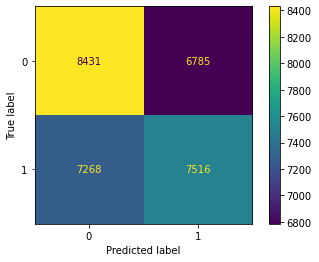

In [155]:
plot_confusion_matrix(knn, X_test, y_test)

In [159]:
# crossvalidation
new_data = convert(new_data)
cross_val_score(knn, new_data.drop('churn',axis=1), new_data['churn'], cv=5)

array([0.52115, 0.5123 , 0.516  , 0.54535, 0.55385])

# Saving the model for future use

In [161]:
joblib.dump(knn, 'model_churn_challenge.pkl')

['model_churn_challenge.pkl']

# Loading the model

In [162]:
loaded_model = joblib.load('model_churn_challenge.pkl')

# Second model using SVM

In [10]:
# separating into train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(new_data.drop('churn', axis=1), new_data['churn'], test_size=0.3)

# checking the size the train and test groups
print(X_train_2.shape, X_test_2.shape)
print(y_train_2.shape, y_test_2.shape)

(70000, 95) (30000, 95)
(70000,) (30000,)


In [ ]:
# create a svm classifier
svm_clf = svm.SVC(kernel='linear') 

# converting the X_train and X_test into numeric
X_train_2 = convert(X_train_2)
X_test_2 = convert(X_test_2)

# train the model using the training sets
svm_clf.fit(X_train_2, y_train_2)

# deploy the model on the test dataset
result_svm = svm_clf.predict(X_test_2)

Didn't have the power and memory to test with SVM model, it broke after 5h31min of training and still it was incomplete....

In [1]:
# accuracy of the SVM model
print("Accuracy:", metrics.accuracy_score(y_test_2, y_pred_2))

NameError: ignored

We can see that the biggest correlation for the variable "churn" is the hnd_price (Current handset price)

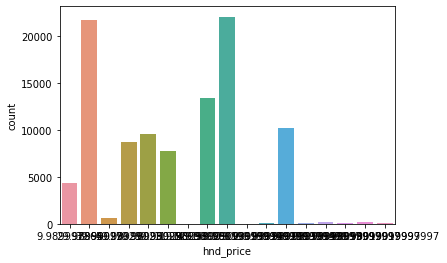

In [6]:
sb.countplot(x="hnd_price", data=data)

In [7]:
data.hnd_price.value_counts

<bound method IndexOpsMixin.value_counts of 0        149.98999
1              NaN
2         29.98999
3         29.98999
4        149.98999
           ...    
99995     29.98999
99996     29.98999
99997    199.98999
99998    149.98999
99999    149.98999
Name: hnd_price, Length: 100000, dtype: float64>

# KNN Model using the whole dataset

In [5]:
# separating into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop('churn', axis=1), data['churn'], test_size=0.3)

# checking the size the train and test groups
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(70000, 98) (30000, 98)
(70000,) (30000,)


In [7]:
# building a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# converting the X_train and X_test into numeric
X_train = convert(X_train)
X_test = convert(X_test)

# train
knn.fit(X_train, y_train)

# deploy the trained model on the test group
result = knn.predict(X_test)

In [8]:
print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53     15204
           1       0.52      0.50      0.51     14796

    accuracy                           0.52     30000
   macro avg       0.52      0.52      0.52     30000
weighted avg       0.52      0.52      0.52     30000



As we can see, using the whole dataset dropped the overall accuracy, compared to what we had before (when we excluded the features ['Customer_ID', 'ownrent', 'forgntvl']). This let us conclude that the dataset might need further analysis and deletion of some more features that are irrelevant or unbalanced before training with KNN-3


# **c) (BÔNUS) Qual o perfil de cliente que possui maior probabilidade de evasão?**

As we saw in the correlation map before, there is a bigger correlation between the variable hnd_price and churn


In [10]:
data_churn = data.loc[data['churn'] == 1]
data_churn

,Customer_ID,churn,HHstatin,actvsubs,adjmou,adjqty,adjrev,adults,area,asl_flag,attempt_Mean,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,avgmou,avgqty,avgrev,blck_dat_Mean,blck_vce_Mean,callfwdv_Mean,callwait_Mean,cc_mou_Mean,ccrndmou_Mean,change_mou,change_rev,comp_dat_Mean,comp_vce_Mean,complete_Mean,crclscod,creditcd,custcare_Mean,da_Mean,datovr_Mean,drop_blk_Mean,drop_dat_Mean,drop_vce_Mean,dualband,...,mou_Mean,mou_cdat_Mean,mou_cvce_Mean,mou_opkd_Mean,mou_opkv_Mean,mou_pead_Mean,mou_peav_Mean,mou_rvce_Mean,mouiwylisv_Mean,mouowylisv_Mean,new_cell,numbcars,opk_dat_Mean,opk_vce_Mean,ovrmou_Mean,ovrrev_Mean,ownrent,owylis_vce_Mean,peak_dat_Mean,peak_vce_Mean,phones,plcd_dat_Mean,plcd_vce_Mean,prizm_social_one,recv_sms_Mean,recv_vce_Mean,refurb_new,rev_Mean,roam_Mean,rv,threeway_Mean,totcalls,totmou,totmrc_Mean,totrev,truck,unan_dat_Mean,unan_vce_Mean,uniqsubs,vceovr_Mean
0,1000001,1,C,1,4085.00,1602,1453.44,1.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,52.333333,272,116,30,322.0,136.0,38.0,83.37,32.69,29.66,0.0,0.666667,0.0,0.333333,0.000000,0.000000,-157.25,-18.9975,0.000000,45.000000,45.000000,A,Y,0.000000,0.2475,0.0,1.333333,0.0,0.666667,Y,...,219.25,0.000000,90.643333,0.0,55.220000,0.000000,132.600000,97.176667,0.000000,0.000000,U,3.0,0.0,24.000000,0.00,0.00,O,0.000000,0.000000,58.000000,2.0,0.000000,52.333333,S,0.0,42.333333,N,23.9975,0.0,0.0,0.000000,1652,4228.00000,22.50,1504.62,0.0,0.0,6.333333,2,0.00
2,1000003,1,C,1,24303.05,7888,1934.47,2.0,GREAT LAKES AREA,N,9.000000,12,7,17,11.0,6.0,17.0,433.98,140.86,34.54,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-4.25,0.0000,0.000000,6.000000,6.000000,C,Y,0.000000,0.0000,0.0,0.333333,0.0,0.333333,N,...,10.25,0.000000,5.426667,0.0,0.233333,0.000000,5.193333,0.000000,0.000000,0.000000,Y,2.0,0.0,1.000000,0.00,0.00,O,0.000000,0.000000,5.000000,2.0,0.000000,9.000000,S,0.0,0.333333,N,16.9900,0.0,0.0,0.000000,7903,24385.05333,16.99,2155.91,0.0,0.0,2.666667,1,0.00
6,1000007,1,I,2,17371.03,6271,3065.24,3.0,DALLAS AREA,N,0.000000,0,0,17,0.0,0.0,17.0,334.06,120.60,58.95,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,-0.1550,0.000000,0.000000,0.000000,A,Y,0.000000,0.0000,0.0,0.000000,0.0,0.000000,Y,...,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,N,NaN,0.0,0.000000,0.00,0.00,O,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,C,0.0,0.000000,N,17.1450,0.0,0.0,0.000000,6279,17390.03333,16.99,3091.70,0.0,0.0,0.000000,2,0.00
20,1000021,1,C,1,78927.02,28359,6472.05,2.0,TENNESSEE AREA,N,760.333333,2314,862,197,2192.0,810.0,163.0,1409.41,506.41,115.57,0.0,18.000000,0.0,20.333333,0.940000,1.000000,-1007.00,-72.4500,0.000000,622.000000,622.000000,A,Y,0.333333,0.0000,0.0,25.333333,0.0,7.333333,Y,...,1978.00,0.000000,1397.513333,0.0,115.576667,0.000000,1797.173333,515.233333,8.476667,22.086667,U,1.0,0.0,60.333333,362.25,72.45,O,22.666667,0.000000,718.000000,4.0,0.000000,760.333333,U,0.0,157.666667,N,172.4400,0.0,1.0,0.666667,28477,79406.01667,99.99,6751.70,1.0,0.0,114.333333,2,72.45
21,1000022,1,C,1,117230.04,78664,5935.58,3.0,NORTHWEST/ROCKY MOUNTAIN AREA,N,47.333333,1803,1290,78,1720.0,1226.0,91.0,2254.42,1512.77,114.15,0.0,0.000000,0.0,5.666667,0.593333,0.666667,-1134.50,-55.1850,0.000000,33.333333,33.333333,D,Y,0.333333,0.2475,0.0,23.666667,0.0,23.666667,N,...,1424.50,0.000000,44.040000,0.0,291.373333,0.000000,692.016667,939.346667,58.913333,11.766667,U,3.0,0.0,174.666667,0.00,0.00,NaN,7.666667,0.000000,459.666667,13.0,0.000000,47.333333,S,0.0,646.000000,N,60.1850,0.0,1.0,0.000000,79038,117808.04000,56.25,6005.39,1.0,0.0,11.666667,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,1099991,1,I,1,2306.00,598,752.03,4.0,LOS ANGELES AREA,N,44.333333,123,26,32,128.0,26.0,37.0,104.82,

In [12]:
churn_per_hnd_price = data_churn.groupby(by='hnd_price').churn.count()
churn_per_hnd_price

hnd_price
9.989998       2557
29.989990     12437
39.989990       377
59.989990      4508
79.989990      4741
99.989990      3648
129.989990     6171
149.989990    10315
159.989990        1
179.989990       43
199.989990     4225
239.989990       24
249.989990       67
299.989990       40
399.989990       78
499.989990       19
Name: churn, dtype: int64

In [13]:
churn_per_area = data_churn.groupby(by='area').churn.count()
churn_per_area

area
ATLANTIC SOUTH AREA              3003
CALIFORNIA NORTH AREA            3081
CENTRAL/SOUTH TEXAS AREA         2057
CHICAGO AREA                     2546
DALLAS AREA                      2645
DC/MARYLAND/VIRGINIA AREA        3023
GREAT LAKES AREA                 2215
HOUSTON AREA                     2062
LOS ANGELES AREA                 3306
MIDWEST AREA                     2913
NEW ENGLAND AREA                 2821
NEW YORK CITY AREA               5552
NORTH FLORIDA AREA               2262
NORTHWEST/ROCKY MOUNTAIN AREA    2463
OHIO AREA                        2124
PHILADELPHIA AREA                1239
SOUTH FLORIDA AREA               1778
SOUTHWEST AREA                   3156
TENNESSEE AREA                   1290
Name: churn, dtype: int64

In [14]:
churn_per_marital = data_churn.groupby(by='marital').churn.count()
churn_per_marital

marital
A     2517
B     3536
M    15174
S     8367
U    19139
Name: churn, dtype: int64

In [15]:
churn_per_ownrent = data_churn.groupby(by='ownrent').churn.count()
churn_per_ownrent

ownrent
O    31319
R     1044
Name: churn, dtype: int64

In [16]:
churn_per_avg3mou = data_churn.groupby(by='avg3mou').churn.count()
churn_per_avg3mou

avg3mou
0       1325
1        161
2        153
3        104
4        106
        ... 
5544       1
5647       1
5768       1
6046       1
7456       1
Name: churn, Length: 2638, dtype: int64

In [17]:
max(churn_per_avg3mou)

1325

Getting partial analysis of the features, we can see that the person that has a high probability of entering to the charn list is the one that has the following characteristics:


*   Has a current handset price of 29.989990
*   Lives in New York
*   Has his/her own house
*   Has an average of 0 monthly minutes of use over the previous three months

